In [1]:
import pandas as pd
final_year = pd.read_csv("final_tmdb_data_2001.csv.gz")
final_year.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1105.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0118154,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,292980.0,en,White Hotel,...,0.0,90.0,"[{'english_name': 'Amharic', 'iso_639_1': 'am'...",Released,NaN,White Hotel,0.0,0.0,0.0,NaN
4,tt0118589,0.0,/bLntSfsqUheiUirdV9Ts8znqsTM.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.6,115.0,PG-13


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [3]:
final_year.drop(final_year[final_year['budget'] == "NaN"].index, inplace = True)

In [4]:
final_year.drop(final_year[final_year['certification'] == "NaN"].index, inplace = True)

- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [5]:
mov_cert= final_year.groupby('certification')
mov_cert.count()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
certification,,,,,,,,,,,,,,,,,,,,,
-,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1
G,14,14,11,6,14,14,3,14,14,14,...,14,14,14,14,14,10,14,14,14,14
NC-17,2,2,1,0,2,2,0,2,2,2,...,2,2,2,2,2,0,2,2,2,2
NR,48,48,17,1,48,48,10,48,48,48,...,48,48,48,48,48,21,48,48,48,48
PG,41,41,24,10,41,41,12,41,41,41,...,41,41,41,41,41,25,41,41,41,41
PG-13,99,99,83,16,99,99,15,99,99,99,...,99,99,99,99,99,80,99,99,99,99
R,239,239,169,12,239,239,26,239,239,239,...,239,239,239,239,239,175,239,239,239,239


R        239
PG-13     99
NR        48
PG        41
G         14
NC-17      2
-          1
Name: certification, dtype: int64


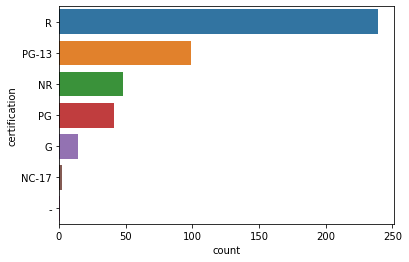

In [6]:
import seaborn as sns
sns.countplot(data=final_year, y='certification',order=final_year.certification.value_counts().index);
print(final_year['certification'].value_counts())

What is the average revenue per certification category? and
What is the average budget per certification category?

In [7]:
mov_cert= final_year.groupby('certification')
mov_cert.mean()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
certification,,,,,,,,,
-,0.0,0.000000e+00,172550.000000,0.831000,0.000000e+00,90.000000,0.000000,5.000000,7.000000
G,0.0,1.770474e+07,42780.857143,22.780857,6.495656e+07,80.000000,0.071429,5.557143,1490.857143
NC-17,1.0,0.000000e+00,86512.500000,1.009500,0.000000e+00,40.500000,0.000000,7.400000,3.000000
NR,0.0,3.937500e+05,259700.250000,3.542125,1.281176e+06,90.312500,0.000000,3.731250,45.729167
PG,0.0,1.843537e+07,83748.487805,23.307927,6.226020e+07,92.292683,0.000000,6.117073,1562.097561
PG-13,0.0,2.896675e+07,51807.676768,13.780444,6.847943e+07,102.262626,0.000000,5.618182,1266.232323
R,0.0,1.047573e+07,64835.736402,8.648381,1.730161e+07,100.598326,0.000000,5.396234,441.698745


In [8]:
final_year.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1105.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0118154,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,292980.0,en,White Hotel,...,0.0,90.0,"[{'english_name': 'Amharic', 'iso_639_1': 'am'...",Released,NaN,White Hotel,0.0,0.0,0.0,NaN
4,tt0118589,0.0,/bLntSfsqUheiUirdV9Ts8znqsTM.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.6,115.0,PG-13
